<a href="https://colab.research.google.com/github/Pranshigupta7275/Data-Analytics-Visualization-Project/blob/main/KagglePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pranshigupta7275","key":"76645b6c7459b0a61bec70e699cce2ea"}'}

In [ ]:
#create kaggle folder
!mkdir -p ~/.kaggle


In [ ]:
#copy the kaggle json folder created
!cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# to list for the json to act
!kaggle datasets list

ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset               10KB  2024-10-29 19:32:26           4113         75  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset      11KB  2024-09-28 20:21:12          24820        493  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                       22KB  2024-10-06 11:27:38          14402        204  1.0              
zeeshier/weather-forecast-dataset                            Weather Forecast Dataset

In [ ]:
!kaggle competitions download -c titanic.zip

403 - Forbidden - Permission 'competitions.participate' was denied


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!unzip test.zip

unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
df = pd.read_csv("/content/drive/MyDrive/Wine (1).csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# Select only the numerical features (drop categorical features)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_features].values

In [ ]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Print the explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.39542486 0.17836259]


In [ ]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.522934,1.453098
1,-2.528858,-0.330019
2,-2.785029,1.036936
3,-3.922588,2.768210
4,-1.407511,0.867773


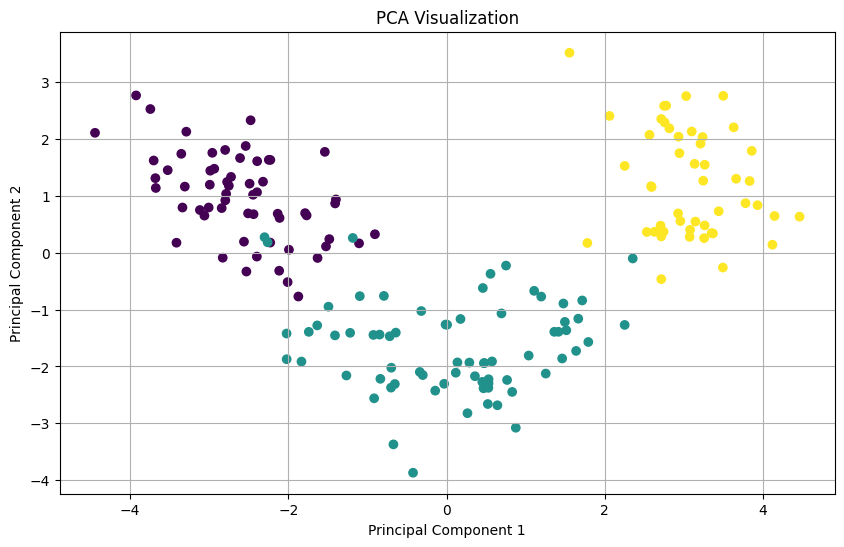

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Customer_Segment'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df.tail()
df.shape
df.size
df.count()
df['Ash'].value_counts()


,count
Ash,
2.30,7
2.28,7
2.70,6
2.32,6
2.36,6
...,...
2.16,1
2.53,1
1.75,1


<Axes: xlabel='Hue', ylabel='Magnesium'>

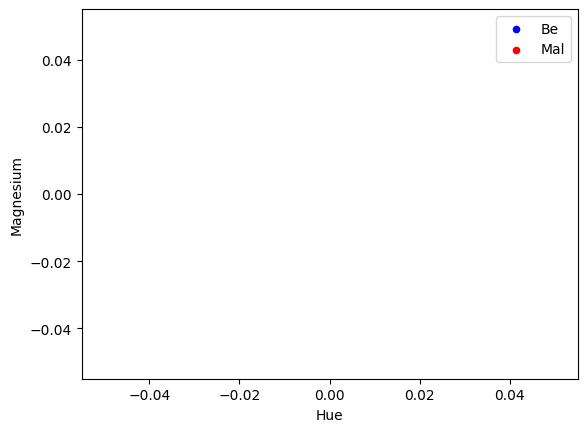

In [ ]:
be_df=df[df['Ash']==7][0:200]
mal_df=df[df['Ash']==1][0:200]
axes= be_df.plot(kind='scatter',x='Alcohol',y='Magnesium',color='blue',label='Be')
mal_df.plot(kind='scatter',x='Hue',y='Magnesium',color='red',label='Mal',ax=axes)

#help(be_df.plot)

In [ ]:
df.dtypes

,0
Alcohol,float64
Malic_Acid,float64
Ash,float64
Ash_Alcanity,float64
Magnesium,int64
Total_Phenols,float64
Flavanoids,float64
Nonflavanoid_Phenols,float64
Proanthocyanins,float64
Color_Intensity,float64


In [ ]:
df.columns
features_df=df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment']]
# Removed extra space before this line
X = np.asarray(features_df)
y=np.asarray(df['Ash'])
X[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03, 1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03, 1.000e+00],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03, 1.000e+00],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03, 1.000e+00],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02, 1.000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train.shape
y_train.shape
X_test.shape
y_test.shape


(36,)

In [ ]:
from sklearn import svm
from sklearn.svm import SVR # Import SVR for regression

# ... (your existing code) ...

# Replace SVC with SVR for continuous target variable
classifier = SVR(kernel='linear', C=2)  # Use SVR for regression
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing code for SVR) ...

# Evaluate regression performance using appropriate metrics
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0033533241824038867
R-squared: 0.9321904365524765
